In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

2025-02-19 15:10:29.354444: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-19 15:10:29.379257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739970629.407007 2461974 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739970629.414319 2461974 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 15:10:29.439890: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def plot_results(mod_history, metric, epochs):
      
      # Check out our train loss and test loss over epochs.
      train_metric = mod_history.history[metric]
      val = 'val_' + metric
      test_metric = mod_history.history[val]

      # Set figure size.
      plt.figure(figsize=(12, 8))

      # Generate line plot of training, testing loss over epochs.
      plt.plot(train_metric, label=f'Training {metric}', color='#185fad')
      plt.plot(test_metric, label=f'Testing {metric}', color='orange')

      # Set title
      plt.title(f'Training and Testing {metric} by Epoch', fontsize = 25)
      plt.xlabel('Epoch', fontsize = 18)
      plt.ylabel('Categorical Crossentropy', fontsize = 18)
      plt.xticks(range(0,epochs,5), range(0,epochs,5))
      plt.legend(fontsize = 18);

In [3]:
def make_predictions(mod_name, steps=20):
    preds = mod_name.predict(X_test,steps=steps)
    preds = preds.argmax(axis=-1)

    y_test_labels = np.argmax(y_test, axis=-1)

    cm = confusion_matrix(y_test_labels,preds)

    plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                          title='Face Shape Normalized')

    plt.show()

In [4]:
cm_plot_labels = ['Heart','Rectangle','Oval','Round', 'Square', 'Triangle']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def plot_summary_results(mod_name, mod_history, epochs):
    plot_results(mod_history, 'loss',epochs)
    plot_results(mod_history, 'accuracy', epochs)
    make_predictions(mod_name)

Model 1: GRAYSCALE images - resize to 224x224


In [6]:
path = './pickle_out/gray/'

X_train = np.asarray(pickle.load(open(path + "pickle_out_grayX_train_gray.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "pickle_out_grayy_train_gray.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "pickle_out_grayX_test_gray.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "pickle_out_grayy_test_gray.pickle","rb")))

In [7]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3620, 224, 224, 1)
y_train shape (3620, 6)
--------------------
X_test shape (1204, 224, 224, 1)
y_test shape (1204, 6)


In [8]:
model_1 = Sequential()
model_1.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_1.add(Dropout(0.5))  ##added
model_1.add(Dense(6, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_1.summary()

/home/vasilemaruseac/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-19 15:10:37.887949: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,438 (2.57 MB)

 Trainable params: 674,438 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_1 = model_1.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=150,
                        validation_data=(X_test, y_test))

Epoch 1/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 28s 215ms/step - accuracy: 0.1824 - loss: 1.7867 - val_accuracy: 0.3488 - val_loss: 1.6448
Epoch 2/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 224ms/step - accuracy: 0.3049 - loss: 1.6631 - val_accuracy: 0.4934 - val_loss: 1.5222
Epoch 3/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 25s 222ms/step - accuracy: 0.4139 - loss: 1.4697 - val_accuracy: 0.5465 - val_loss: 1.2996
Epoch 4/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 27s 238ms/step - accuracy: 0.4417 - loss: 1.3755 - val_accuracy: 0.6121 - val_loss: 1.0767
Epoch 5/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 225ms/step - accuracy: 0.4764 - loss: 1.2668 - val_accuracy: 0.6811 - val_loss: 1.0588
Epoch 6/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 245ms/step - accuracy: 0.5415 - loss: 1.1624 - val_accuracy: 0.6977 - val_loss: 0.8739
Epoch 7/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 207ms/step - accuracy: 0.5769 - loss: 1.0432 - val_accuracy: 0.7533 - val_loss: 0.7635
Epoch 8/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.5809 -

In [10]:
# max validation score @ Epoch 115/150
max(history_1.history['val_accuracy'])

0.9385381937026978

In [11]:
model_1.evaluate(X_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9260 - loss: 0.4232


[0.5274378657341003, 0.9294019937515259]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
Normalized confusion matrix
[[0.8960396  0.04950495 0.00990099 0.         0.01980198 0.02475248]
 [0.015      0.93       0.03       0.         0.         0.025     ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.03       0.015      0.905      0.025      0.025     ]
 [0.02020202 0.01010101 0.03030303 0.         0.93434343 0.00505051]
 [0.02       0.045      0.015      0.005      0.005      0.91      ]]


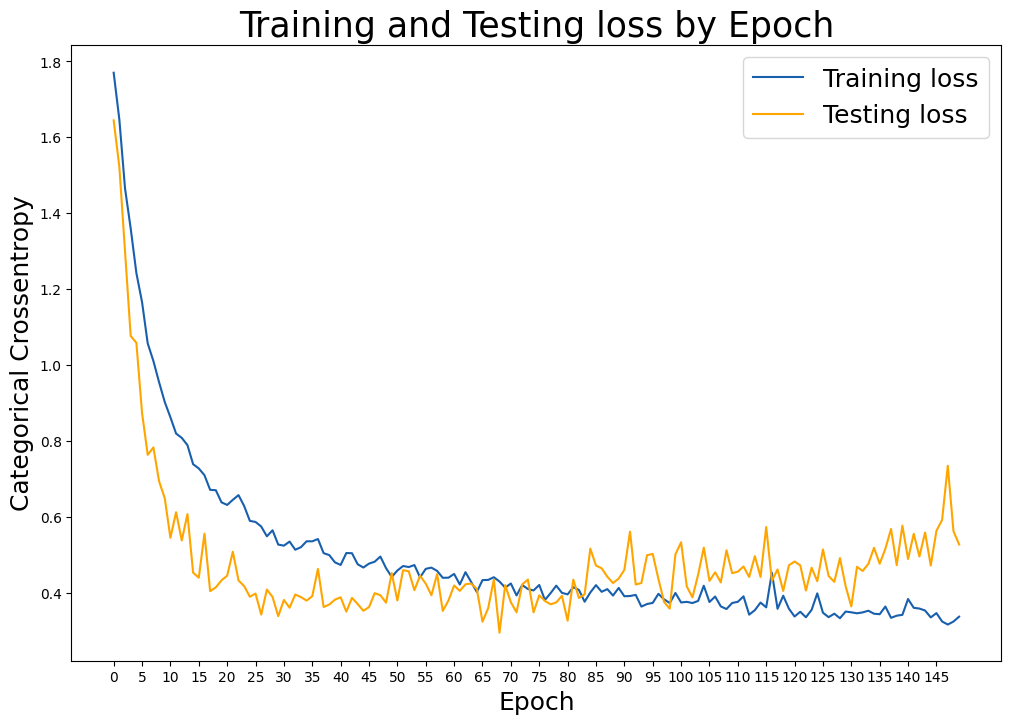

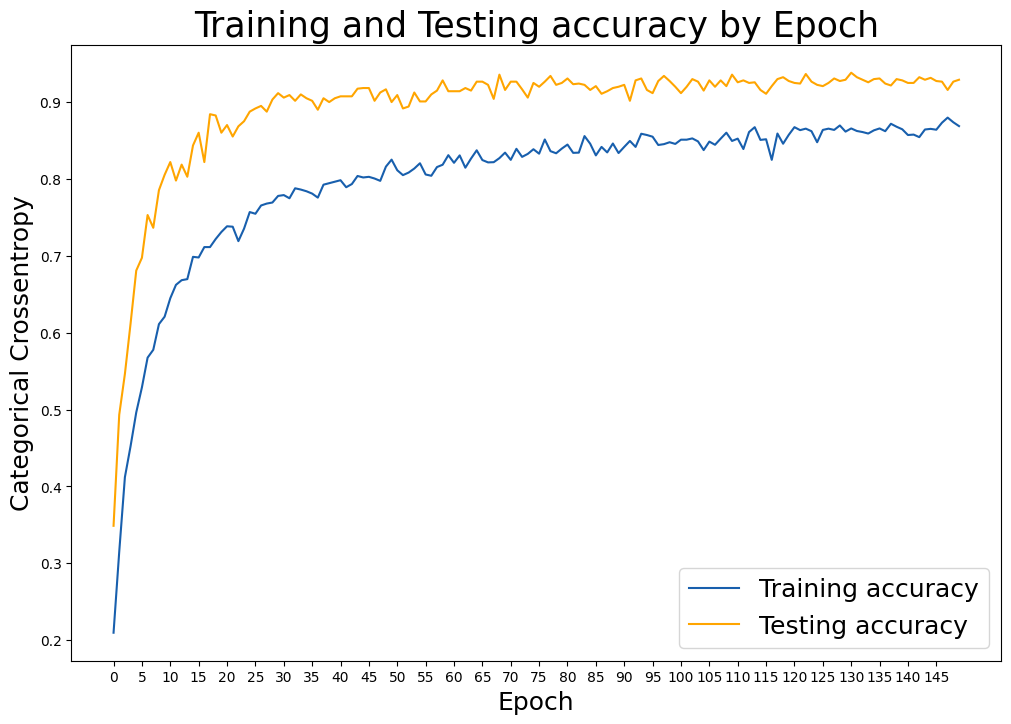

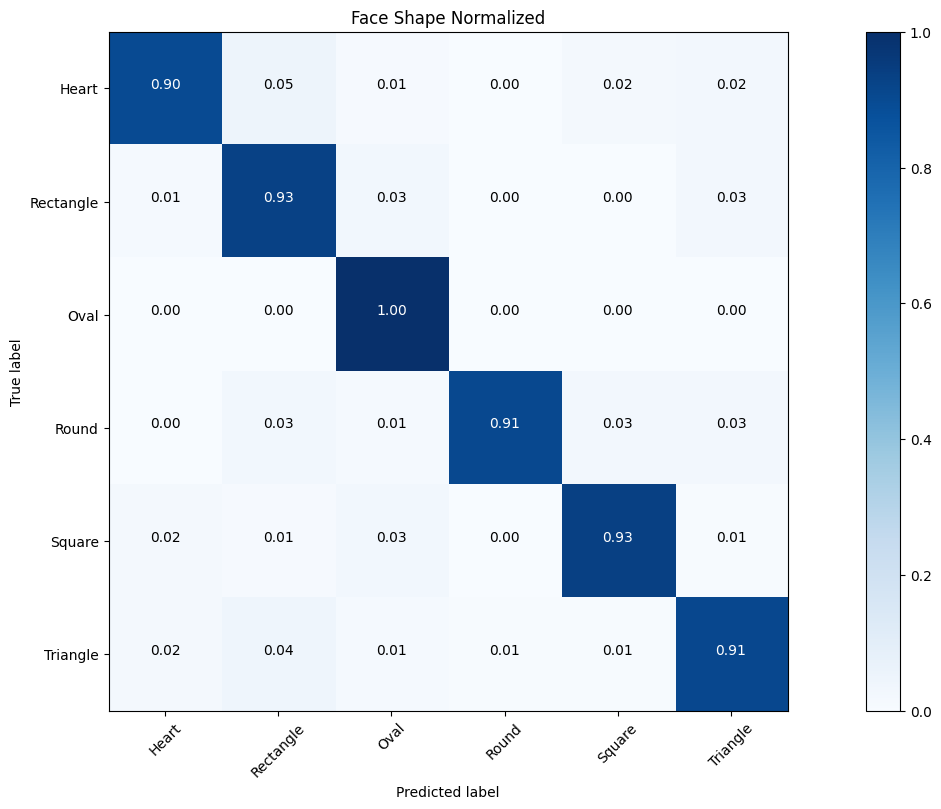

In [12]:
plot_summary_results(model_1, history_1, 150)

In [13]:
model_path = './SavedModels/Resize.keras'
# tf.keras.models.save_model(
#     model_1, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None, signatures=None, options=None)
tf.keras.models.save_model(
    model_1, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None)

filename = model_path + 'resize_feb19_2025.keras'   # change the filename for new iterations
model_1.save(filename)

Model 2: GRAYSCALE images - crop & resize keeping aspect ratio -> APR

In [14]:
path = './pickle_out/apr/'

X_train = np.asarray(pickle.load(open(path + "pickle_out_aprX_train_apr.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "pickle_out_apry_train_apr.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "pickle_out_aprX_test_apr.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "pickle_out_apry_test_apr.pickle","rb")))

In [15]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3620, 224, 224, 1)
y_train shape (3620, 6)
--------------------
X_test shape (1204, 224, 224, 1)
y_test shape (1204, 6)


In [16]:
model_2 = Sequential()
model_2.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_2.add(Dropout(0.5))  ##added
model_2.add(Dense(6, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_2.summary()

/home/vasilemaruseac/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,438 (2.57 MB)

 Trainable params: 674,438 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_2 = model_2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=150,
                        validation_data=(X_test, y_test))

Epoch 1/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 208ms/step - accuracy: 0.1864 - loss: 1.7935 - val_accuracy: 0.2932 - val_loss: 1.7052
Epoch 2/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.2613 - loss: 1.7026 - val_accuracy: 0.3397 - val_loss: 1.5993
Epoch 3/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 27s 235ms/step - accuracy: 0.3181 - loss: 1.6014 - val_accuracy: 0.4128 - val_loss: 1.4689
Epoch 4/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 28s 242ms/step - accuracy: 0.3574 - loss: 1.5115 - val_accuracy: 0.4551 - val_loss: 1.3688
Epoch 5/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 28s 250ms/step - accuracy: 0.3894 - loss: 1.4335 - val_accuracy: 0.5199 - val_loss: 1.2307
Epoch 6/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step - accuracy: 0.4490 - loss: 1.3056 - val_accuracy: 0.5698 - val_loss: 1.1273
Epoch 7/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.4737 - loss: 1.2251 - val_accuracy: 0.6221 - val_loss: 1.0278
Epoch 8/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 27s 232ms/step - accuracy: 0.5326 -

In [18]:
# max validation score @ Epoch 38/150
max(history_2.history['val_accuracy'])

0.8978405594825745

In [19]:
model_2.evaluate(X_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8487 - loss: 0.7106


[0.741543710231781, 0.8571428656578064]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step 
Normalized confusion matrix
[[0.90594059 0.00990099 0.02970297 0.0049505  0.04455446 0.0049505 ]
 [0.045      0.685      0.125      0.025      0.05       0.07      ]
 [0.00490196 0.         0.98529412 0.00490196 0.         0.00490196]
 [0.015      0.         0.05       0.92       0.01       0.005     ]
 [0.04040404 0.03535354 0.03535354 0.03030303 0.84343434 0.01515152]
 [0.055      0.025      0.045      0.02       0.055      0.8       ]]


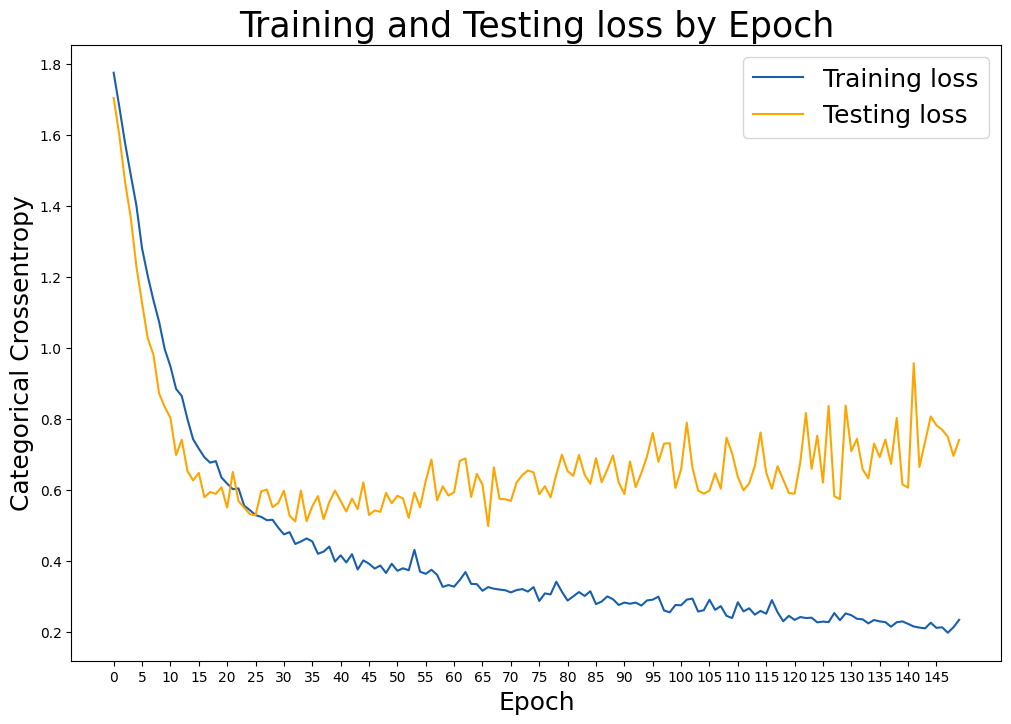

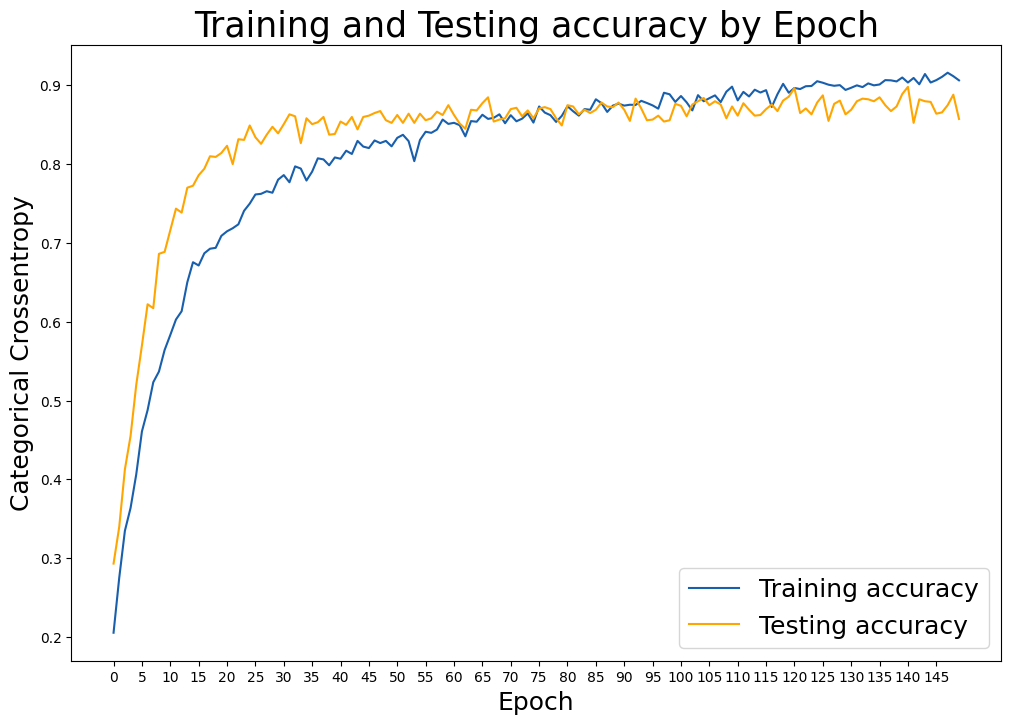

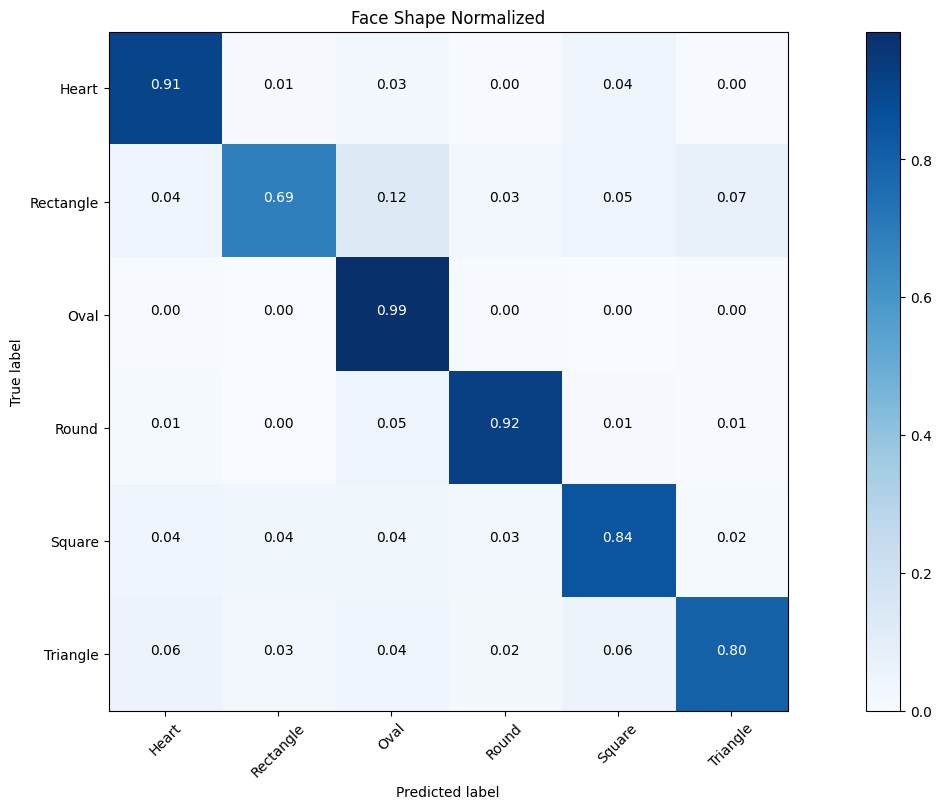

In [20]:
plot_summary_results(model_2, history_2, 150)

In [22]:
model_path = './SavedModels/APR.keras'
tf.keras.models.save_model(
    model_2, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None)

filename = model_path + 'crop_feb19_2025.keras'   # change the filename for new iterations
model_2.save(filename)

Model 3: GRAYSCALE images - Detect Face with Bounding Box

In [23]:
path = './pickle_out/gray/'

X_train = np.asarray(pickle.load(open(path + "pickle_out_grayX_train_gray.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "pickle_out_grayy_train_gray.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "pickle_out_grayX_test_gray.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "pickle_out_grayy_test_gray.pickle","rb")))

In [24]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3620, 224, 224, 1)
y_train shape (3620, 6)
--------------------
X_test shape (1204, 224, 224, 1)
y_test shape (1204, 6)


In [25]:
model_3 = Sequential()
model_3.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_3.add(Dropout(0.5))  ##added
model_3.add(Dense(6, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_3.summary()

/home/vasilemaruseac/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,438 (2.57 MB)

 Trainable params: 674,438 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0,  
                           patience=5, mode='auto')

In [27]:
history_3 = model_3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=250,
                        validation_data=(X_test, y_test))

Epoch 1/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.1929 - loss: 1.7923 - val_accuracy: 0.2957 - val_loss: 1.7079
Epoch 2/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.2085 - loss: 1.7651 - val_accuracy: 0.3106 - val_loss: 1.6486
Epoch 3/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.2790 - loss: 1.6686 - val_accuracy: 0.3704 - val_loss: 1.6188
Epoch 4/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.2908 - loss: 1.6017 - val_accuracy: 0.4743 - val_loss: 1.3497
Epoch 5/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.3336 - loss: 1.5084 - val_accuracy: 0.5042 - val_loss: 1.3172
Epoch 6/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.3403 - loss: 1.4843 - val_accuracy: 0.4950 - val_loss: 1.3189
Epoch 7/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - accuracy: 0.3490 - loss: 1.4658 - val_accuracy: 0.5208 - val_loss: 1.2262
Epoch 8/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.3780 -

In [28]:
# max validation score @ Epoch 83/250
max(history_3.history['val_accuracy'])

0.9235880374908447

In [29]:
model_3.evaluate(X_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9048 - loss: 0.6680 


[0.6644486784934998, 0.8995016813278198]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
Normalized confusion matrix
[[0.92574257 0.02475248 0.0049505  0.         0.02970297 0.01485149]
 [0.025      0.915      0.005      0.01       0.015      0.03      ]
 [0.         0.         0.99509804 0.         0.00490196 0.        ]
 [0.         0.         0.005      0.96       0.025      0.01      ]
 [0.01515152 0.02020202 0.1010101  0.02525253 0.83333333 0.00505051]
 [0.005      0.075      0.095      0.04       0.02       0.765     ]]


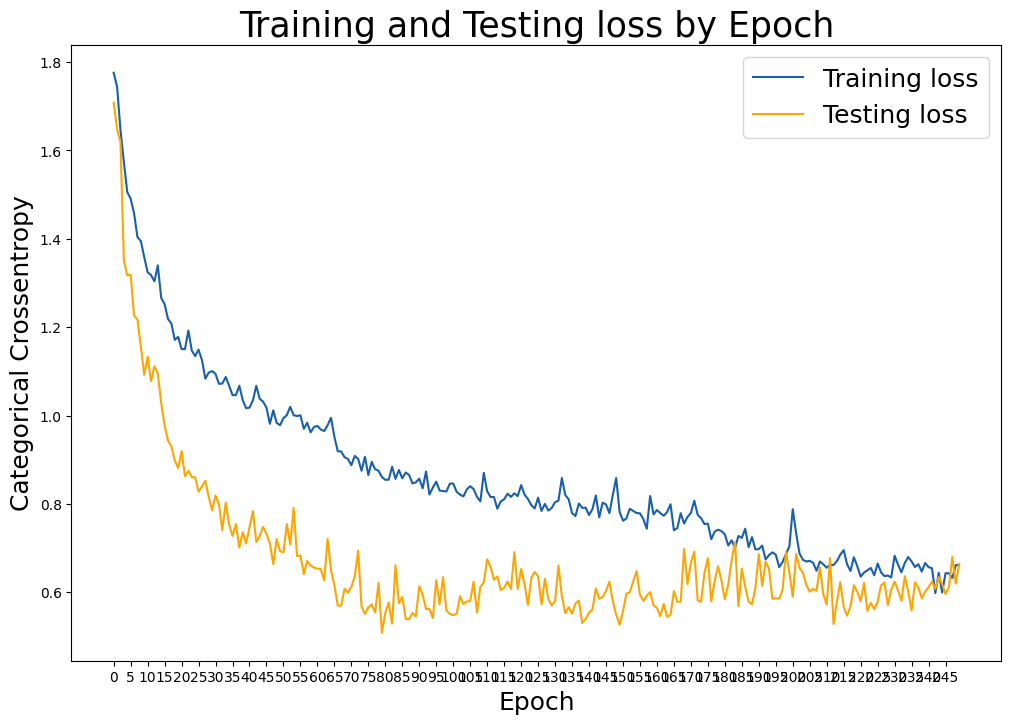

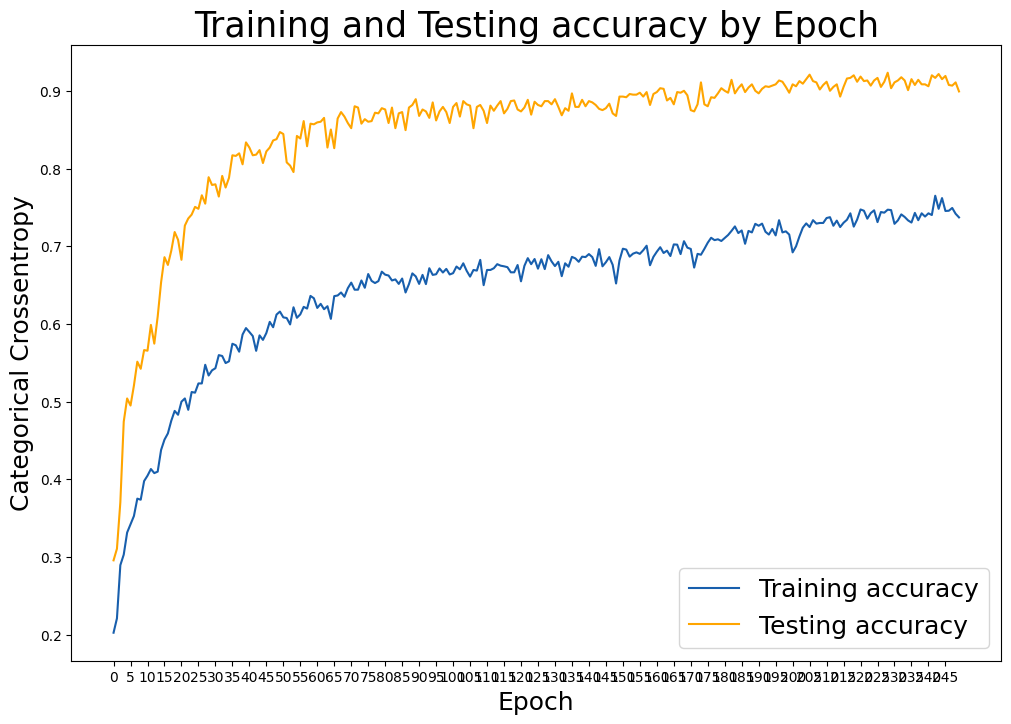

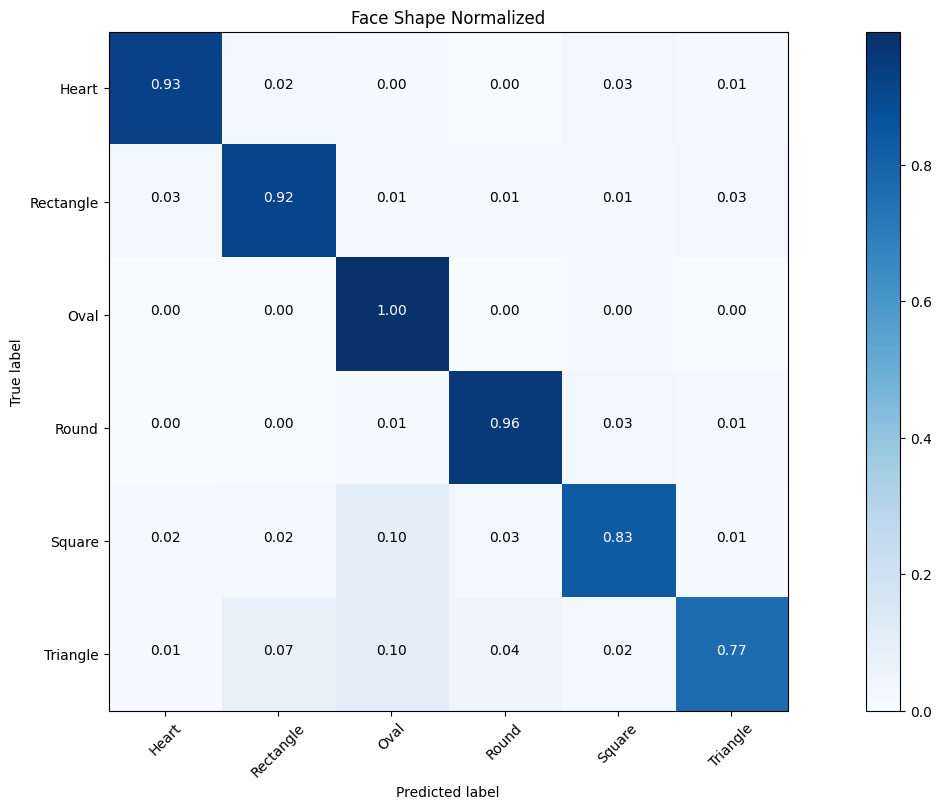

In [30]:
plot_summary_results(model_3, history_3, 250)

In [32]:
model_path = './SavedModels/Gray.keras'
tf.keras.models.save_model(
    model_3, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None)

filename = model_path + 'gray_feb19_2025.keras'   # change the filename for new iterations
model_3.save(filename)

Model 4: RGB COLOR images - Detect Face with Bounding Box

In [33]:
path = './pickle_out/rgb/'

X_train = np.asarray(pickle.load(open(path + "pickle_out_rgbX_train_rgb.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "pickle_out_rgby_train_rgb.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "pickle_out_rgbX_test_rgb.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "pickle_out_rgby_test_rgb.pickle","rb")))

In [34]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3620, 224, 224, 3)
y_train shape (3620, 6)
--------------------
X_test shape (1204, 224, 224, 3)
y_test shape (1204, 6)


In [35]:
model_4 = Sequential()
model_4.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_4.add(Dropout(0.5))  ##added
model_4.add(Dense(6, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_4.summary()

/home/vasilemaruseac/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 674,582 (2.57 MB)

 Trainable params: 674,582 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history_4 = model_4.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=250,
                        validation_data=(X_test, y_test)) #,
                        #callbacks=[early_stop])

Epoch 1/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 208ms/step - accuracy: 0.1721 - loss: 1.7927 - val_accuracy: 0.2492 - val_loss: 1.7549
Epoch 2/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 26s 229ms/step - accuracy: 0.2282 - loss: 1.7162 - val_accuracy: 0.4203 - val_loss: 1.4913
Epoch 3/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - accuracy: 0.3452 - loss: 1.5436 - val_accuracy: 0.5017 - val_loss: 1.3494
Epoch 4/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.4291 - loss: 1.3827 - val_accuracy: 0.5764 - val_loss: 1.1109
Epoch 5/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 25s 215ms/step - accuracy: 0.4614 - loss: 1.2774 - val_accuracy: 0.6794 - val_loss: 0.9461
Epoch 6/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 212ms/step - accuracy: 0.4999 - loss: 1.1856 - val_accuracy: 0.7226 - val_loss: 0.8739
Epoch 7/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 207ms/step - accuracy: 0.5274 - loss: 1.1259 - val_accuracy: 0.7650 - val_loss: 0.7927
Epoch 8/250
114/114 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - accuracy: 0.5487 -

In [37]:
# max validation score @ Epoch 238/250
max(history_4.history['val_accuracy'])

0.9634551405906677

In [38]:
model_4.evaluate(X_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9474 - loss: 0.5897 


[0.5098439455032349, 0.9518272280693054]

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step
Normalized confusion matrix
[[0.96039604 0.01980198 0.00990099 0.0049505  0.         0.0049505 ]
 [0.02       0.935      0.015      0.005      0.005      0.02      ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.96       0.025      0.015     ]
 [0.00505051 0.03030303 0.01515152 0.02020202 0.92424242 0.00505051]
 [0.01       0.03       0.         0.01       0.02       0.93      ]]


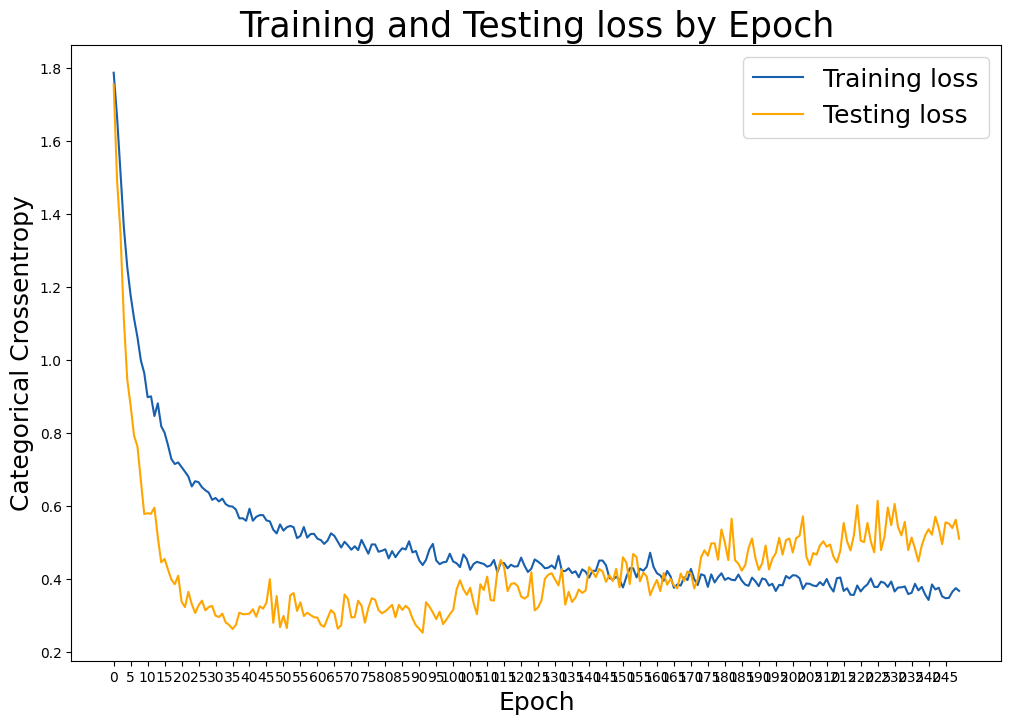

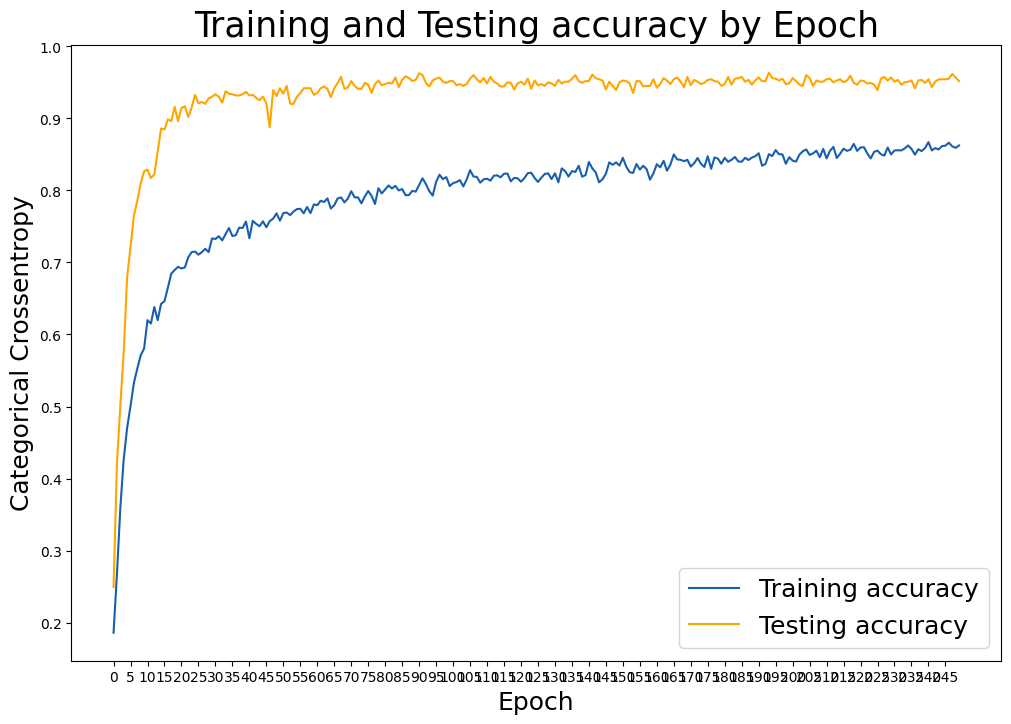

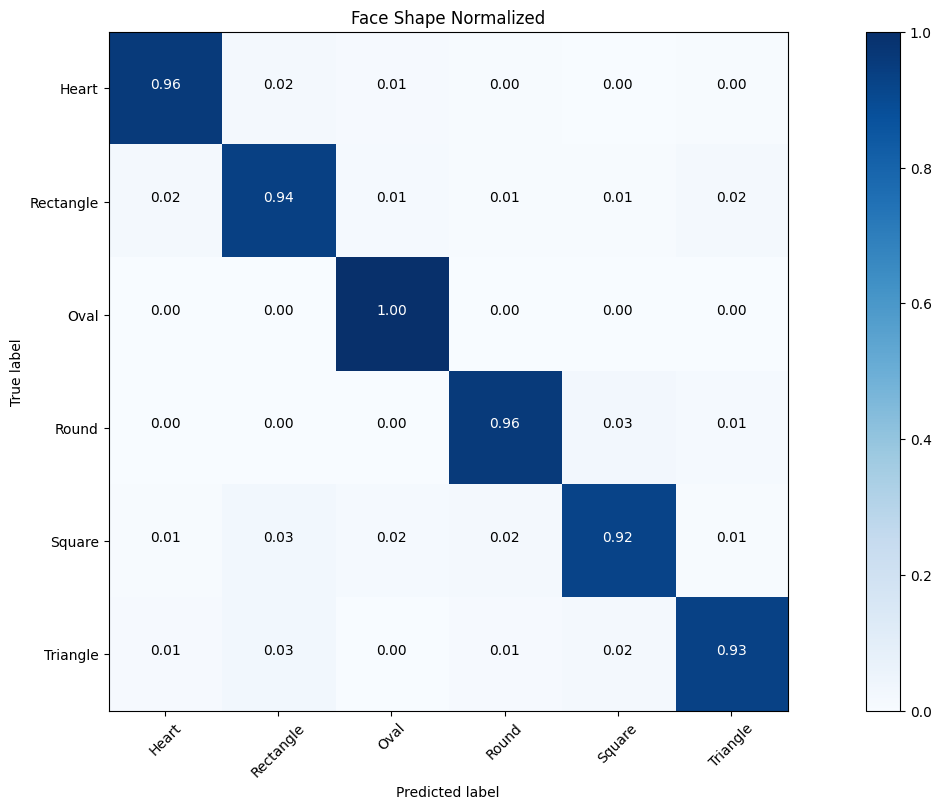

In [39]:
plot_summary_results(model_4, history_4, 250)

In [40]:
model_path = './SavedModels/RGB.keras'
tf.keras.models.save_model(
    model_4, filepath=model_path, overwrite=True, include_optimizer=True, save_format=None)

filename = model_path + 'rgb_feb19_2025.keras'   # change the filename for new iterations
model_4.save(filename)

In [48]:
# Load in the saved model

loaded_model = tf.keras.models.load_model(filename)

# Compare the predictions from the model_4 vs. the saved version of model_4
predict_x=model_4.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(predict_x)
print(classes_x)

loaded_predict_x=loaded_model.predict(X_test) 
loaded_classes_x=np.argmax(loaded_predict_x,axis=1)
print(loaded_predict_x)
print(loaded_classes_x)

# mod4_predict = model_4.predict_classes(X_test)
# loaded4_predict = loaded_model.predict_classes(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
[[0.00000000e+00 3.70749820e-28 0.00000000e+00 1.00000000e+00
  2.04136220e-19 4.78823224e-32]
 [3.85590851e-01 6.14409149e-01 6.13103401e-10 3.69680002e-18
  1.55164437e-10 2.06493052e-11]
 [7.30449174e-05 2.12375357e-06 1.49281532e-05 2.86708291e-06
  9.98584867e-01 1.32218481e-03]
 ...
 [1.13905919e-07 3.20859726e-05 2.39448099e-07 8.72449236e-05
  9.99879956e-01 3.48731362e-07]
 [9.11153077e-17 9.99161482e-01 5.59884438e-06 1.40328938e-13
  2.11477922e-17 8.32960068e-04]
 [1.18177388e-08 2.07321386e-06 1.03119415e-08 2.13130880e-12
  9.99997973e-01 4.35499119e-12]]
[3 1 4 ... 4 1 4]
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step 
[[0.00000000e+00 3.70749820e-28 0.00000000e+00 1.00000000e+00
  2.04136220e-19 4.78823224e-32]
 [3.85590851e-01 6.14409149e-01 6.13103401e-10 3.69680002e-18
  1.55164437e-10 2.06493052e-11]
 [7.30449174e-05 2.12375357e-06 1.49281532e-05 2.86708291e-06
  9.98584867e-01 1.32218481e-03]
 ...
 [1.13905919e-07 3.20859726e-05 2.3

In [49]:
# Check the difference

print(f'Difference in predictions: Saved model vs. original model is {np.sum(predict_x - loaded_predict_x)}')
print(f'Difference in predictions: Saved model vs. original model is {np.sum(classes_x - loaded_classes_x)}')

Difference in predictions: Saved model vs. original model is 0.0
Difference in predictions: Saved model vs. original model is 0
